In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
sns.set_palette('colorblind')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 1.5)


# Parameter sweep data viz (binding model)

In [5]:
# Open parameter sweep results file and extract data in DataFrame

pd.set_option('display.float_format', '{:.2e}'.format)

df = pd.read_csv('ps_outputs/binding_model/binding_cluster_number_parameter_sweep_data.txt', header=None, names = ['No. of clusters', 'Chemotaxis strength (unbound)', 'Chemotaxis strength (bound)', 'Cell-matrix drag', 'Production rate', 'Degradation rate'])

df.head()

,No. of clusters,Chemotaxis strength (unbound),Chemotaxis strength (bound),Cell-matrix drag,Production rate,Degradation rate
0,1.00e-01,3.04e+01,4.99e+01,1.86e+09,7.36e-11,3.51e-04
1,0.00e+00,2.93e-01,1.83e+01,6.81e+09,3.36e-11,8.01e-04
2,1.00e+00,2.93e-01,2.49e+01,6.81e+09,3.30e-11,8.01e-04
3,7.00e+00,2.93e-01,2.49e+01,6.81e+09,3.36e-11,4.67e-04
4,0.00e+00,5.37e+00,2.49e+01,6.81e+09,3.36e-11,8.01e-04


In [6]:
# nondimensionalise values

# multiply chemotaxis strength columns by 10
df['Chemotaxis strength (unbound)'] = df['Chemotaxis strength (unbound)'] * 10
df['Chemotaxis strength (bound)'] = df['Chemotaxis strength (bound)'] * 10

# multiply cell-matrix drag column by 9e-10
df['Cell-matrix drag'] = df['Cell-matrix drag'] * 9e-10

# multiply production rate column by 1e14
df['Production rate'] = df['Production rate'] * 1e14

# multiply degradation rate column by 1e5
df['Degradation rate'] = df['Degradation rate'] * 1e5

In [7]:
df.head()

,No. of clusters,Chemotaxis strength (unbound),Chemotaxis strength (bound),Cell-matrix drag,Production rate,Degradation rate
0,1.00e-01,3.04e+02,4.99e+02,1.67e+00,7.36e+03,3.51e+01
1,0.00e+00,2.93e+00,1.83e+02,6.13e+00,3.36e+03,8.01e+01
2,1.00e+00,2.93e+00,2.49e+02,6.13e+00,3.30e+03,8.01e+01
3,7.00e+00,2.93e+00,2.49e+02,6.13e+00,3.36e+03,4.67e+01
4,0.00e+00,5.37e+01,2.49e+02,6.13e+00,3.36e+03,8.01e+01


## Data subset for which more than 4 clusters emerged

In [8]:
# df2 is a new DataFrame containing only rows where the number of clusters is greater than 4
df2 = df[df['No. of clusters'] > 4]

df2

,No. of clusters,Chemotaxis strength (unbound),Chemotaxis strength (bound),Cell-matrix drag,Production rate,Degradation rate
3,7.00e+00,2.93e+00,2.49e+02,6.13e+00,3.36e+03,4.67e+01
12,5.40e+00,2.53e+02,4.99e+02,1.67e+00,7.36e+03,9.17e+01
13,6.60e+00,3.04e+02,4.33e+02,7.73e+00,7.30e+03,9.17e+01
20,4.80e+00,4.29e+02,5.76e+01,5.50e+00,5.30e+03,6.92e+01
21,6.80e+00,1.79e+02,3.74e+02,3.90e+00,5.36e+03,5.76e+01
...,...,...,...,...,...,...
889,6.90e+00,6.84e+00,4.17e+02,1.33e+00,8.30e+03,7.66e+01
890,5.60e+00,1.51e+02,4.17e+02,1.33e+00,8.30e+03,7.66e+01
891,5.50e+00,6.84e+00,1.94e+02,1.33e+00,8.30e+03,7.66e+01
892,8.60e+00,6.84e+00,4.17e+02,2.65e+00,8.30e+03,7.66e+01


In [9]:
# make new column with 3 bins based on the number of clusters
df2['Average number of clusters'] = pd.cut(df2['No. of clusters'].to_numpy(), bins = [4, 6, 8, 20], labels = ['4-6', '6-8', '8+'], include_lowest=True, right = False)

<ipython-input-9-a6102c9425e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Average number of clusters'] = pd.cut(df2['No. of clusters'].to_numpy(), bins = [4, 6, 8, 20], labels = ['4-6', '6-8', '8+'], include_lowest=True, right = False)


### Correlation coefficients

<AxesSubplot:>

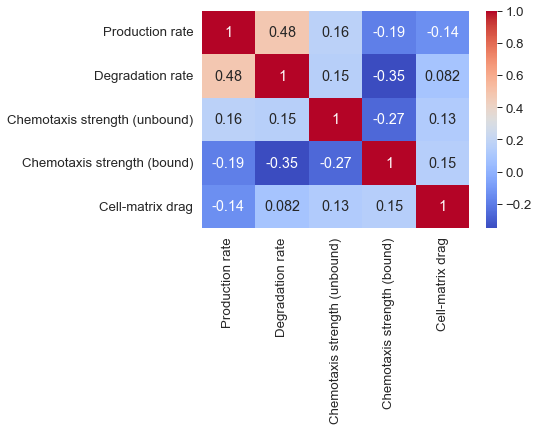

In [10]:
# calculate correlation matrix for df2 and show values in a heatmap for production rate, degradation rate, chemotaxis strength and cell-matrix drag
df3 = df2[['Production rate', 'Degradation rate', 'Chemotaxis strength (unbound)', 'Chemotaxis strength (bound)', 'Cell-matrix drag']]
corr = df3.corr('pearson')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')

### Visualise data subset

Text(0, 0.5, '')

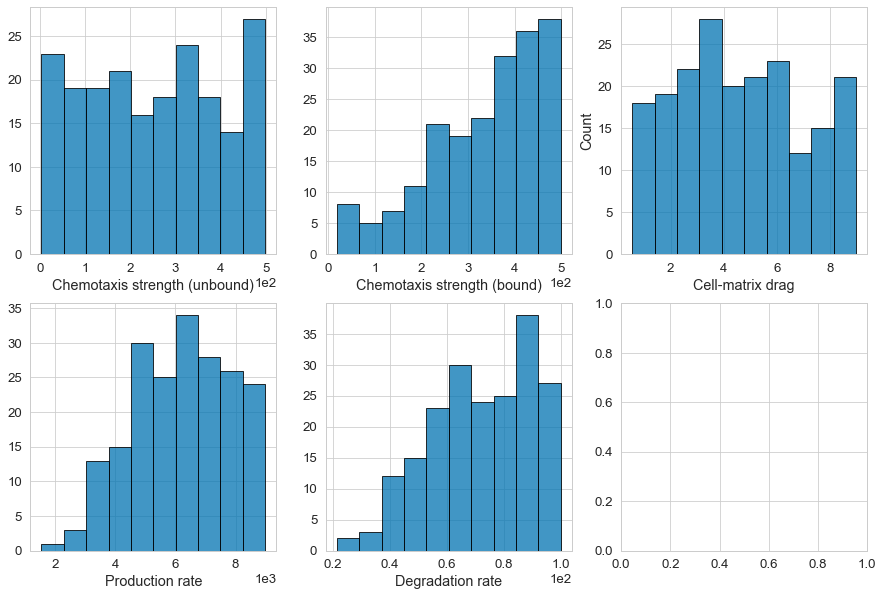

In [11]:
# plot histograms of each parameter with 10 bins with black outlines
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
sns.histplot(df2, x = 'Chemotaxis strength (unbound)', bins = 10, ax = axes[0, 0], edgecolor = 'black')
sns.histplot(df2, x = 'Chemotaxis strength (bound)', bins = 10, ax = axes[0, 1], edgecolor = 'black')
sns.histplot(df2, x = 'Cell-matrix drag', bins = 10, ax = axes[0, 2], edgecolor = 'black')
sns.histplot(df2, x = 'Production rate', bins = 10, ax = axes[1, 0], edgecolor = 'black')
sns.histplot(df2, x = 'Degradation rate', bins = 10, ax = axes[1, 1], edgecolor = 'black')

# change axis to scientific notation
for ax in axes.flatten():
    if ax:
        ax.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

# remove y axis labels
axes[0, 0].set_ylabel('')
axes[0, 1].set_ylabel('')
axes[1, 0].set_ylabel('')
axes[1, 1].set_ylabel('')


<ipython-input-12-ec88f406cd04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Average number of clusters'] = pd.cut(df3['No. of clusters'].to_numpy(), bins = [6, 8, 20], labels = ['6-8', '8+'], include_lowest=True, right = False)


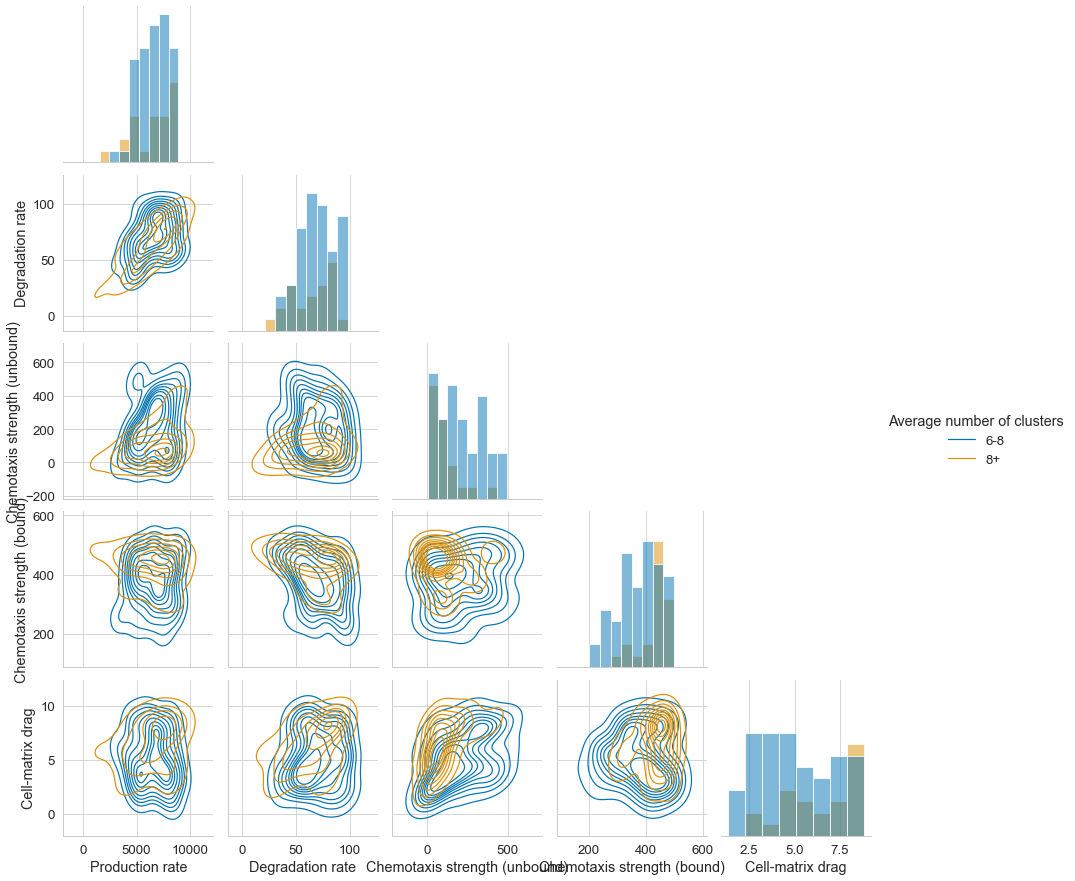

In [12]:
# pairplot for clusters > 6

df3 = df[df['No. of clusters'] > 6]
df3['Average number of clusters'] = pd.cut(df3['No. of clusters'].to_numpy(), bins = [6, 8, 20], labels = ['6-8', '8+'], include_lowest=True, right = False)
# make pairplot for production rate, degradation rate, chemotaxis strength (bound and unbound) and cell-matrix drag
sns.pairplot(df3, kind = 'kde', diag_kind='hist', hue = 'Average number of clusters', vars = ['Production rate', 'Degradation rate', 'Chemotaxis strength (unbound)', 'Chemotaxis strength (bound)', 'Cell-matrix drag'], corner = True)

### Relationship between production rate and degradation rate (r = 0.39)

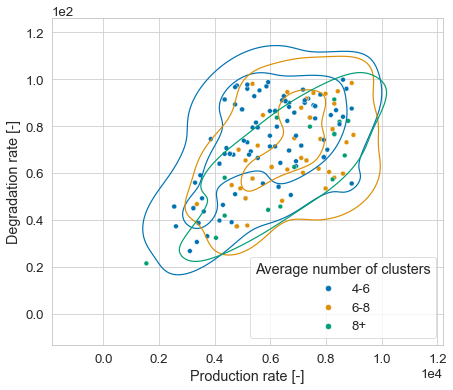

In [13]:
plt.figure(figsize=(7, 6))
# scatterplot and kde plot
ax = sns.kdeplot(x = 'Production rate', y = 'Degradation rate', data = df2, hue = 'Average number of clusters', levels = 3)
sns.scatterplot(x = 'Production rate', y = 'Degradation rate', data = df2, hue = 'Average number of clusters')
plt.xlabel('Production rate [-]')
plt.ylabel('Degradation rate [-]')
# scientific notation
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,2))
#plt.savefig('ps_plots/binding_plots/prod_deg_scatter_labelled.png', dpi = 300)


(0.0, 120.0)

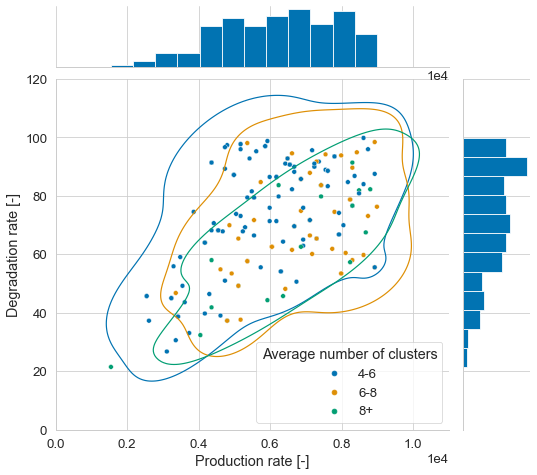

In [14]:

# Create a joint plot with scatterplot and histogram
g = sns.jointplot(x='Production rate', y='Degradation rate', data=df2, kind='scatter', hue = 'Average number of clusters')

# change marginal plots to histogram
g.ax_marg_x.hist(df2['Production rate'], bins = 12)
g.ax_marg_y.hist(df2['Degradation rate'], bins = 12, orientation = 'horizontal')
# add kde to marginal
g.ax_marg_x.hist(df2['Production rate'], bins = 12, density = True)

# add kde plot to the scatterplot
sns.kdeplot(x = 'Production rate', y = 'Degradation rate', data = df2, levels = 1, ax = g.ax_joint, hue = 'Average number of clusters', legend = False)

# scientific notation
g.ax_joint.ticklabel_format(style='sci', axis='both', scilimits=(0,3))

# change axis labels
g.set_axis_labels('Production rate [-]', 'Degradation rate [-]')

# change plot size
g.fig.set_size_inches(8, 7)

# change legend location to bottom right
g.ax_joint.legend(loc = 'lower right', title = 'Average number of clusters')

# change axis limits
g.ax_joint.set_xlim(0, 11000)
g.ax_joint.set_ylim(0, 120)

# save plot
#plt.savefig('ps_plots/binding_plots/prod_deg_jointplot_labelled.png', dpi = 300)

Text(0, 0.5, 'Degradation rate [-]')

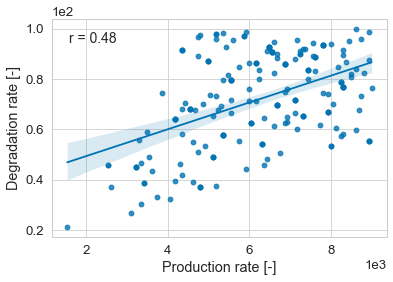

In [15]:
# find correlation between production rate and degradation rate
p = df2['Production rate'].corr(df2['Degradation rate'])
# plot regplot between the production rate and degradation rate
sns.regplot(x='Production rate', y='Degradation rate', data=df2)
# add a title to the plot with p to 2 decimal places
#plt.title(f'Correlation between production rate and degradation rate: {p:.2f}', pad = 10)
# annotate p value on the plot
plt.annotate(f'r = {p:.2f}', xy=(0.05, 0.89), xycoords='axes fraction', fontsize = 14)
# scientific notation
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

plt.xlabel('Production rate [-]')
plt.ylabel('Degradation rate [-]')


<Figure size 720x720 with 0 Axes>

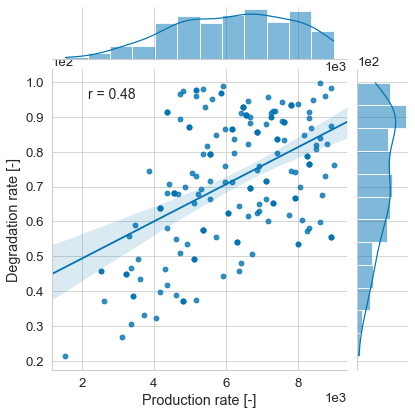

In [16]:
# Create a joint probability plot, with regression line
# and marginal distributions
# with scientific notation
plt.figure(figsize=(10, 10))
g = sns.jointplot(x='Production rate', y='Degradation rate', data=df2, kind='reg', truncate = False, marginal_kws=dict(bins=12, ))
# annotate p value on the plot
p = df2['Production rate'].corr(df2['Degradation rate'])
plt.annotate(f'r = {p:.2f}', xy=(-5.3, 0.9), xycoords='axes fraction', fontsize = 14)

# change x axis label
g.set_axis_labels('Production rate [-]', 'Degradation rate [-]')

# change axis to scientific notation
g.ax_joint.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

#plt.savefig('ps_plots/binding_plots/prod_deg_jointplot.png', dpi = 300)

### Relationship between bound chemotaxis strength and degradation rate

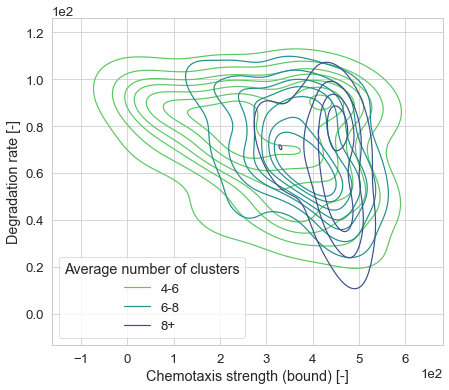

In [17]:
plt.figure(figsize=(7, 6))
ax = sns.kdeplot(x = 'Chemotaxis strength (bound)', y = 'Degradation rate', hue = 'Average number of clusters', data = df2, levels = 8, palette='viridis_r')
sns.move_legend(ax, loc = 'lower left')
plt.xlabel('Chemotaxis strength (bound) [-]')
plt.ylabel('Degradation rate [-]')
# scientific notation
ax.ticklabel_format(style='sci', axis='both', scilimits=(0,2))
#plt.savefig('ps_plots/binding_plots/chem_deg_kde_labelled.png', dpi = 300)

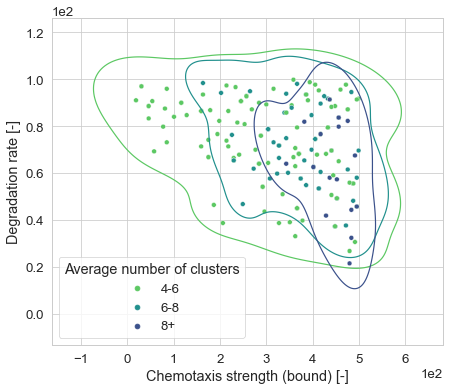

In [18]:
plt.figure(figsize=(7, 6))
# scatterplot and kde plot
ax = sns.kdeplot(x = 'Chemotaxis strength (bound)', y = 'Degradation rate', data = df2, hue = 'Average number of clusters', levels = 1, palette='viridis_r')
sns.scatterplot(x = 'Chemotaxis strength (bound)', y = 'Degradation rate', data = df2, hue = 'Average number of clusters', palette = 'viridis_r')
plt.xlabel('Chemotaxis strength (bound) [-]')
plt.ylabel('Degradation rate [-]')
# scientific notation
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,2))
#plt.savefig('ps_plots/binding_plots/chem_deg_scatter_labelled.png', dpi = 300)


Text(0, 0.5, 'Degradation rate [-]')

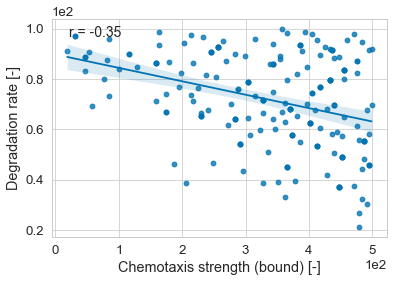

In [19]:
# find correlation between chemotaxis strength and deg rate
p = df2['Chemotaxis strength (bound)'].corr(df2['Degradation rate'])
# plot regplot between the chemotaxis strength and deg rate
sns.regplot(x='Chemotaxis strength (bound)', y='Degradation rate', data=df2)
# add a title to the plot with p to 2 decimal places
#plt.title(f'Correlation between chemotaxis strength and cell-matrix drag: {p:.2f}', pad=15)
# annotate p value on the plot
plt.annotate(f'r = {p:.2f}', xy=(0.05, 0.92), xycoords='axes fraction', fontsize = 14)
# scientific notation
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

plt.xlabel('Chemotaxis strength (bound) [-]')
plt.ylabel('Degradation rate [-]')

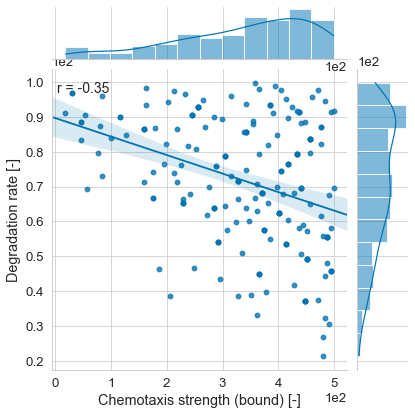

In [20]:
# Create a joint probability plot, with regression line
# and marginal distributions with 10 bins
g = sns.jointplot(x='Chemotaxis strength (bound)', y='Degradation rate', data=df2, kind='reg', truncate = False, marginal_kws=dict(bins=12))
# annotate p value on the plot
p = df2['Chemotaxis strength (bound)'].corr(df2['Degradation rate'])
plt.annotate(f'r = {p:.2f}', xy=(-5.9, 0.92), xycoords='axes fraction', fontsize = 14)

# scientific notation
g.ax_joint.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

# change x axis label
g.set_axis_labels('Chemotaxis strength (bound) [-]', 'Degradation rate [-]')


#plt.savefig('ps_plots/binding_plots/chem_deg_jointplot.png', dpi = 300)


(-20.0, 600.0)

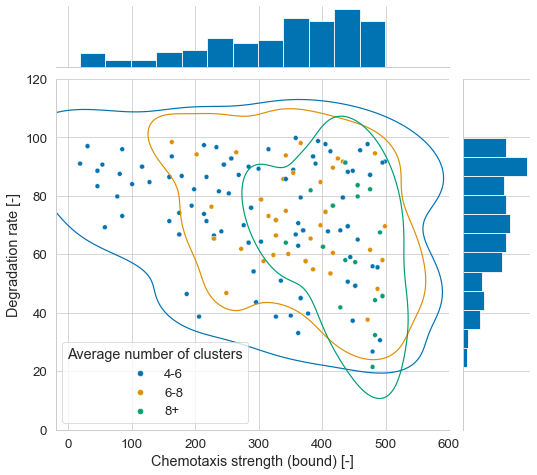

In [21]:

# Create a joint plot with scatterplot and histogram
g = sns.jointplot(x='Chemotaxis strength (bound)', y='Degradation rate', data=df2, kind='scatter', hue = 'Average number of clusters', legend = True)

# change marginal plots to histogram
g.ax_marg_x.hist(df2['Chemotaxis strength (bound)'], bins = 12)
g.ax_marg_y.hist(df2['Degradation rate'], bins = 12, orientation = 'horizontal')
# add kde to marginal
g.ax_marg_x.hist(df2['Chemotaxis strength (bound)'], bins = 12, density = True)

# add kde plot to the scatterplot
sns.kdeplot(x = 'Chemotaxis strength (bound)', y = 'Degradation rate', data = df2, levels = 1, ax = g.ax_joint, hue = 'Average number of clusters', legend=False)

# scientific notation
g.ax_joint.ticklabel_format(style='sci', axis='both', scilimits=(0,3))

# change axis labels
g.set_axis_labels('Chemotaxis strength (bound) [-]', 'Degradation rate [-]')

# change plot size
g.fig.set_size_inches(8, 7)

# change legend location to lower left
g.ax_joint.legend(loc = 'lower left', title = 'Average number of clusters')

# change axis limits
g.ax_joint.set_ylim(-0.0000, 120)
g.ax_joint.set_xlim(-20, 600)


# save plot
#g.savefig('ps_plots/binding_plots/chem_deg_jointplot_labelled.png', dpi = 300)


### Relationship between bound and unbound chemotaxis parameters

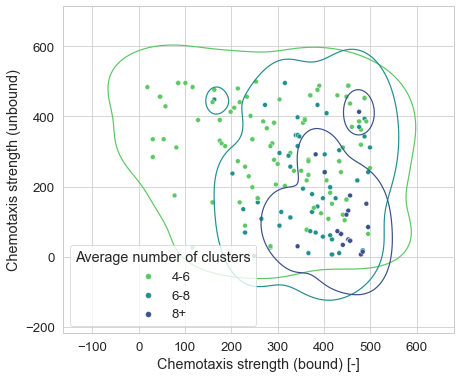

In [22]:
plt.figure(figsize=(7, 6))
# scatterplot and kde plot
ax = sns.kdeplot(x = 'Chemotaxis strength (bound)', y = 'Chemotaxis strength (unbound)', data = df2, hue = 'Average number of clusters', levels = 1, palette='viridis_r')
sns.scatterplot(x = 'Chemotaxis strength (bound)', y = 'Chemotaxis strength (unbound)', data = df2, hue = 'Average number of clusters', palette = 'viridis_r')
plt.xlabel('Chemotaxis strength (bound) [-]')
plt.ylabel('Chemotaxis strength (unbound)')
# scientific notation
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,3))
#plt.savefig('ps_plots/binding_plots/chem_deg_scatter_labelled.png', dpi = 300)

(-100.0, 620.0)

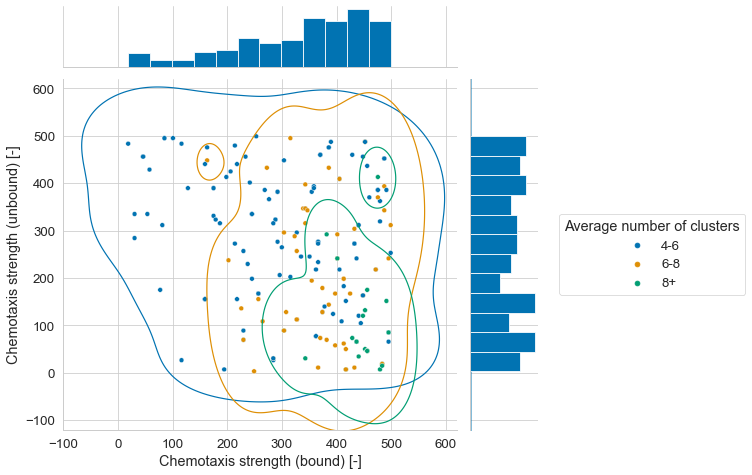

In [23]:

# Create a joint plot with scatterplot and histogram
g = sns.jointplot(x='Chemotaxis strength (bound)', y='Chemotaxis strength (unbound)', data=df2, kind='scatter', hue = 'Average number of clusters')

# change marginal plots to histogram
g.ax_marg_x.hist(df2['Chemotaxis strength (bound)'], bins = 12)
g.ax_marg_y.hist(df2['Chemotaxis strength (unbound)'], bins = 12, orientation = 'horizontal')
# add kde to marginal
g.ax_marg_x.hist(df2['Chemotaxis strength (bound)'], bins = 12, density = True)

# add kde plot to the scatterplot
sns.kdeplot(x = 'Chemotaxis strength (bound)', y = 'Chemotaxis strength (unbound)', data = df2, levels = 1, ax = g.ax_joint, hue = 'Average number of clusters')

# scientific notation
g.ax_joint.ticklabel_format(style='sci', axis='both', scilimits=(0,3))

# change axis labels
g.set_axis_labels('Chemotaxis strength (bound) [-]', 'Chemotaxis strength (unbound) [-]')

# change plot size
g.fig.set_size_inches(8, 7)

# change legend location
g.ax_joint.legend(loc = 'center right', title = 'Average number of clusters', bbox_to_anchor = (1.75, 0.5), ncol = 1)

# change axis limits
g.ax_joint.set_ylim(-120, 620)
g.ax_joint.set_xlim(-100, 620)

# save whole plot
#g.savefig('ps_plots/binding_plots/chem_chem_jointplot_labelled.png', dpi = 300)


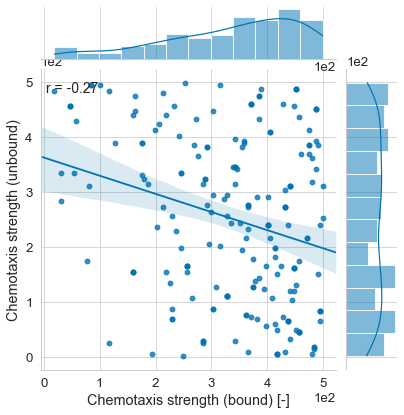

In [24]:
# Create a joint probability plot, with regression line
# and marginal distributions with 10 bins
g = sns.jointplot(x='Chemotaxis strength (bound)', y='Chemotaxis strength (unbound)', data=df2, kind='reg', truncate = False, marginal_kws=dict(bins=12))
# annotate p value on the plot
p = df2['Chemotaxis strength (bound)'].corr(df2['Chemotaxis strength (unbound)'])
plt.annotate(f'r = {p:.2f}', xy=(-5.9, 0.92), xycoords='axes fraction', fontsize = 14)

# scientific notation
g.ax_joint.ticklabel_format(style='sci', axis='both', scilimits=(0,2))

# change x axis label
g.set_axis_labels('Chemotaxis strength (bound) [-]', 'Chemotaxis strength (unbound)')


#plt.savefig('ps_plots/binding_plots/chem_chem_jointplot.png', dpi = 300)